<a href="https://colab.research.google.com/github/Mreeb/llama2-Fine-tuning-On-Custom-Medical_data/blob/master/Data_Preperatoin_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [98]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
import pandas as pd

DatasetFiles = [
    'generated_data.csv',
    'generated_data1.csv',
    'generated_data2.csv',
    'generated_data3.csv',
    'generated_data4.csv',
    'generated_data5.csv',
    'generated_data6.csv',
    'generated_data7.csv',
    'generated_data8.csv',
    'generated_data9.csv',
    'generated_data10.csv',
    'generated_data11.csv',
    'generated_data12.csv',
    'generated_data13.csv',
    'generated_data14.csv',
    'generated_data15.csv',
    'generated_data16.csv',
    'generated_data17.csv',
    'generated_data18.csv',
    'generated_data19.csv',
    'generated_data20.csv',
    'generated_data21.csv',
    'generated_data22.csv',
    'generated_data23.csv'
]

combined_data = pd.DataFrame()

for file in DatasetFiles:
    try:
        data = pd.read_csv(file)
        combined_data = combined_data.append(data, ignore_index=True)
    except FileNotFoundError:
        print(f"File {file} not found. Skipping...")


In [100]:
print(len(combined_data))

1619


In [101]:
combined_data.head()

,prompt,response
0,What is psoriasis and what are its common symp...,Psoriasis is a chronic autoimmune condition th...
1,What is the etiology of acne?,Acne is primarily caused by the overproduction...
2,What are the recommended medications for atopi...,There are several medications available for th...
3,Can you tell me about the treatment modalities...,Melanoma treatment depends on the stage and lo...
4,What is rosacea and what are its common symptoms?,Rosacea is a common skin condition that causes...


In [102]:
combined_data.tail()

,prompt,response
1614,What is the process of treating a surgical wou...,Treating a surgical wound infection involves t...
1615,What are the stages of wound healing?,The wound healing process involves several sta...
1616,What are some prevention strategies for pressu...,Preventing pressure ulcers involves several st...
1617,What are some common symptoms of a skin wound ...,A skin wound infection might present several s...
1618,Can you explain what a pressure ulcer is?,"A pressure ulcer, also known as a pressure sor..."


In [103]:
print(combined_data.duplicated().sum())
print(combined_data.duplicated(subset='prompt').sum())

1
158


In [104]:
df = combined_data.drop_duplicates()
df = df.drop_duplicates(subset='prompt')

In [105]:
print(len(df))

1461


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1618
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   prompt    1461 non-null   object
 1   response  1461 non-null   object
dtypes: object(2)
memory usage: 34.2+ KB


In [107]:
df.shape

(1461, 2)

In [108]:
df.isna().sum()

prompt      0
response    0
dtype: int64

In [109]:
print(df.duplicated().sum())
print(df.duplicated(subset='prompt').sum())

0
0


In [110]:
df.describe(include = 'all')

,prompt,response
count,1461,1461
unique,1461,1461
top,What is psoriasis and what are its common symp...,Psoriasis is a chronic autoimmune condition th...
freq,1,1


In [111]:
df['prompt'][10]

'What are the recommended medications for treating hives?'

In [112]:
short_prompts = df[df['prompt'].str.len() < 10]
short_responses = df[df['response'].str.len() < 10]

print(short_prompts)
print(short_responses)

       prompt response
518  response   prompt
       prompt response
518  response   prompt


In [113]:
rows_to_delete = short_prompts.index.union(short_responses.index)
df = df.drop(rows_to_delete)
df = df.reset_index(drop=True)

In [114]:
short_prompts = df[df['prompt'].str.len() < 10]
short_responses = df[df['response'].str.len() < 10]

print(short_prompts)
print(short_responses)

Empty DataFrame
Columns: [prompt, response]
Index: []
Empty DataFrame
Columns: [prompt, response]
Index: []


In [160]:
plt.style.use('ggplot')

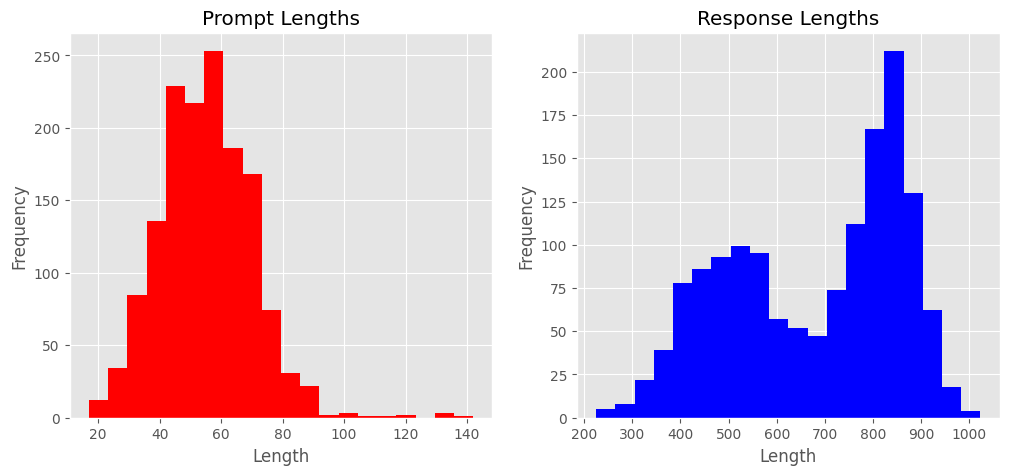

In [168]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df['prompt'].apply(len), color='red', bins=20)
ax1.set_title('Prompt Lengths')
ax1.set_xlabel('Length')
ax1.set_ylabel('Frequency')

ax2.hist(df['response'].apply(len), color='blue', bins=20)
ax2.set_title('Response Lengths')
ax2.set_xlabel('Length')
ax2.set_ylabel('Frequency')

plt.show()

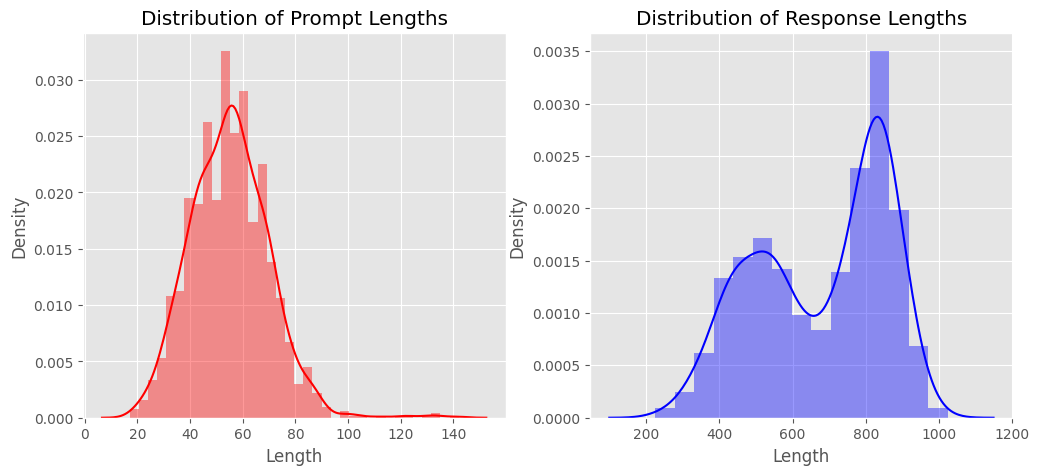

In [169]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.distplot(df['prompt'].apply(len), kde=True, color='red', ax=ax1)
ax1.set_title('Distribution of Prompt Lengths')
ax1.set_xlabel('Length')
ax1.set_ylabel('Density')

sns.distplot(df['response'].apply(len), kde=True, color='blue', ax=ax2)
ax2.set_title('Distribution of Response Lengths')
ax2.set_xlabel('Length')
ax2.set_ylabel('Density')

plt.show()

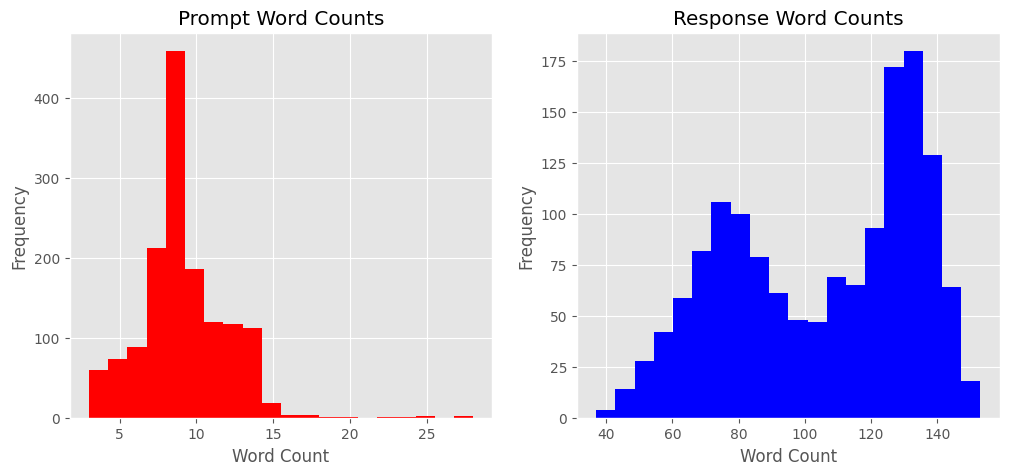

In [171]:
df['prompt_word_count'] = df['prompt'].apply(lambda x: len(x.split()))
df['response_word_count'] = df['response'].apply(lambda x: len(x.split()))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df['prompt_word_count'], color='red', bins=20)
ax1.set_title('Prompt Word Counts')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')

ax2.hist(df['response_word_count'], color='blue', bins=20)
ax2.set_title('Response Word Counts')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')

plt.show()

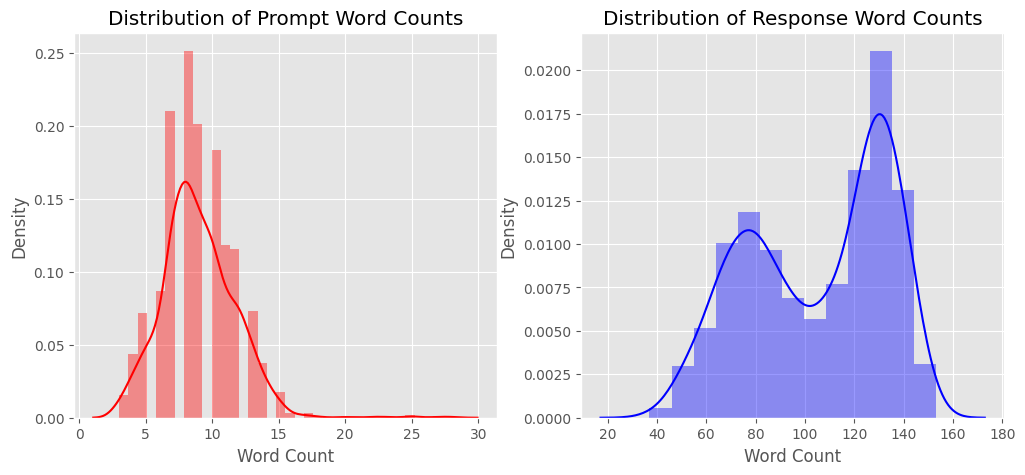

In [181]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.distplot(df['prompt_word_count'], kde=True, color='red', ax=ax1)
ax1.set_title('Distribution of Prompt Word Counts')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Density')
sns.distplot(df['response_word_count'], kde=True, color='blue', ax=ax2)
ax2.set_title('Distribution of Response Word Counts')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Density')
plt.show()

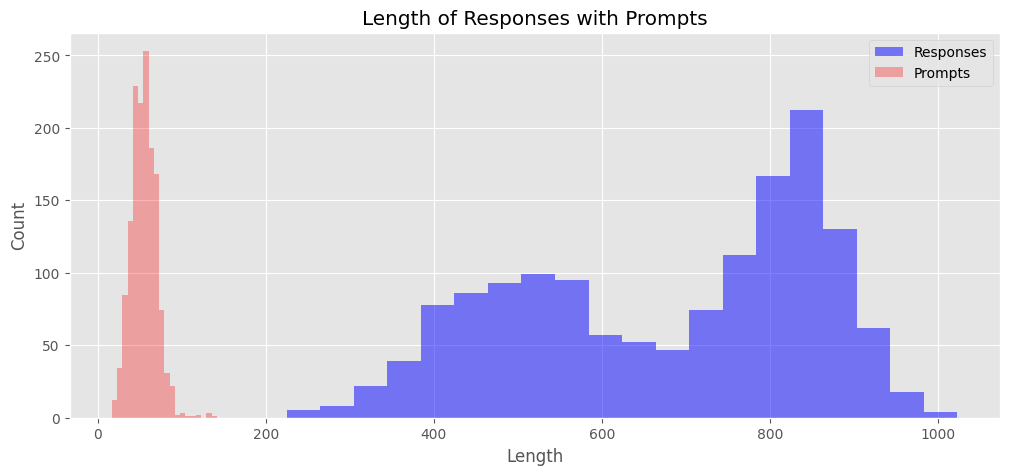

In [180]:
plt.figure(figsize=(12, 5))
plt.hist(df['response'].apply(len), bins=20, alpha=0.5, color='blue', label='Responses')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.hist(df['prompt'].apply(len), bins=20, alpha=0.3, color='red', label='Prompts')
plt.legend()

plt.title('Length of Responses with Prompts')
plt.show()

In [182]:
# Save the combined data to a new CSV file
df.to_csv('combined_data.csv', index=False)

print("Combined data saved to 'combined_data.csv'")

Combined data saved to 'combined_data.csv'
